In [1]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from datetime import date
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
df_submission = pd.read_csv('data/SubmissionFormat.csv')

df_test = pd.read_csv('data/test_set_values.csv')
df_training_labels = pd.read_csv('data/training_set_labels.csv')
df_training_values = pd.read_csv('data/training_set_values.csv')


In [47]:
df_training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [48]:
df_training_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [3]:
df_train = pd.concat([df_training_values, df_training_labels], join='inner',axis=1)

In [66]:
df_train.shape

(59400, 42)

In [67]:
df_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'id', 'status_group'],
      dtype='object')

In [4]:
X_train = df_training_values.drop('id',axis=1)
y_train = df_training_labels.drop('id',axis=1)

In [5]:
X_train['date_recorded'] = pd.to_datetime(X_train['date_recorded'])
X_train['days_old'] = pd.to_datetime(date.today()) - X_train['date_recorded']
X_train = X_train.drop('date_recorded',axis=1)
X_train['days_old'].head()

0   3213 days
1   2490 days
2   2499 days
3   2527 days
4   3092 days
Name: days_old, dtype: timedelta64[ns]

In [34]:
X_train[X_train['funder'].isna()]

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,days_old
34,0.0,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,Rufiji,Kilombero B,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,3232 days
43,0.0,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,Internal,Mwarufyu,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,2540 days
47,0.0,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,Lake Nyasa,Mpandapanda,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,3078 days
65,0.0,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,Internal,Mfumbu,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,2515 days
71,0.0,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,Rufiji,Lembuka,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,3196 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59357,0.0,NaN,1635,NaN,34.971841,-5.098362,Shabani,0,Internal,Mampando A,...,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,2505 days
59366,0.0,NaN,1541,NaN,34.765729,-5.027725,Joshoni,0,Internal,Mungumaho,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2522 days
59370,200.0,NaN,1154,NaN,30.058731,-4.902633,Village Office,0,Lake Tanganyika,Mazungwe,...,unknown,unknown,unknown,unknown,unknown,other,unknown,other,other,2526 days
59376,0.0,NaN,1581,NaN,34.821039,-5.076258,Nasingo,0,Internal,Hu,...,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other,2521 days


In [6]:
def nan_func(column):
    X_train[column].fillna('others', inplace=True)

In [7]:
nan_func('funder')
nan_func('installer')
nan_func('subvillage')
nan_func('scheme_management')
nan_func('permit')

In [8]:
X_train[X_train['installer'].isna()]

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,days_old


In [9]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.543080808080808

In [79]:
X_train['num_private'].describe()

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

In [109]:
X_train['scheme_management'].value_counts()


VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [110]:
X_train[ 'scheme_name'].value_counts()

K                          682
None                       644
Borehole                   546
Chalinze wate              405
M                          400
                          ... 
Rain Water Havest            1
Dara                         1
Bwawa                        1
Pande plot Water supply      1
Shallow Welll                1
Name: scheme_name, Length: 2696, dtype: int64

In [141]:
X_train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [140]:
X_train['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [139]:
X_train['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [107]:
X_train.shape

(59400, 39)

In [114]:
(X_train['subvillage']=='other').sum()

0

In [121]:
X_train['permit'].isna().sum()

3056

In [23]:
X_train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'days_old'],
      dtype='object')

In [10]:
X_train_min = X_train[['amount_tsh','funder','gps_height', 'installer','wpt_name', 'num_private','basin','population','recorded_by','scheme_management',
                        'permit', 'construction_year','extraction_type','management_group','payment','quality_group','source_class','waterpoint_type_group','days_old']]
X_train_max = X_train[['amount_tsh','funder','gps_height', 'installer','wpt_name', 'num_private','subvillage','population','recorded_by','scheme_management',
                       'permit', 'construction_year','extraction_type_class','management','payment','quantity','source', 'waterpoint_type','days_old']]

In [180]:
X_train.isna().sum()

amount_tsh                   0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'Timedelta'

In [ ]:
X_train_min.dtypes

In [17]:
def ohe_func(X):
    
    ohe = OneHotEncoder(handle_unknown='ignore')
    count = 1
    for column in X.columns:
        if (X[column].dtype) == object:
            
            ohe_temp = ohe.fit_transform(X[column].values.reshape(-1, 1))
            X = pd.concat([X, pd.DataFrame(ohe_temp.todense())], axis=1)
            X.drop(column, axis=1, inplace=True)
        count+=1
        print(count)
        if count >= 10:
            break
#     columns = ohe.get_feature_names(input_features=X_train_cat.columns)

In [ ]:
ohe_func(X_train_min)

2
3
4
5
6
7


In [16]:
X_train_min.head()

,amount_tsh,funder,gps_height,installer,wpt_name,num_private,basin,population,recorded_by,scheme_management,permit,construction_year,extraction_type,management_group,payment,quality_group,source_class,waterpoint_type_group,days_old
0,6000.0,Roman,1390,Roman,none,0,Lake Nyasa,109,GeoData Consultants Ltd,VWC,False,1999,gravity,user-group,pay annually,good,groundwater,communal standpipe,3213 days
1,0.0,Grumeti,1399,GRUMETI,Zahanati,0,Lake Victoria,280,GeoData Consultants Ltd,Other,True,2010,gravity,user-group,never pay,good,surface,communal standpipe,2490 days
2,25.0,Lottery Club,686,World vision,Kwa Mahundi,0,Pangani,250,GeoData Consultants Ltd,VWC,True,2009,gravity,user-group,pay per bucket,good,surface,communal standpipe,2499 days
3,0.0,Unicef,263,UNICEF,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,58,GeoData Consultants Ltd,VWC,True,1986,submersible,user-group,never pay,good,groundwater,communal standpipe,2527 days
4,0.0,Action In A,0,Artisan,Shuleni,0,Lake Victoria,0,GeoData Consultants Ltd,others,True,0,gravity,other,never pay,good,surface,communal standpipe,3092 days


amount_tsh                       float64
funder                            object
gps_height                         int64
installer                         object
longitude                        float64
latitude                         float64
wpt_name                          object
num_private                        int64
basin                             object
subvillage                        object
region                            object
region_code                        int64
district_code                      int64
lga                               object
ward                              object
population                         int64
public_meeting                    object
recorded_by                       object
scheme_management                 object
scheme_name                       object
permit                            object
construction_year                  int64
extraction_type                   object
extraction_type_group             object
extraction_type_

In [73]:
columns_to_use=['amount_tsh','funder','gps_height','status_group']

In [122]:
from sklearn.tree import DecisionTreeClassifier 

In [123]:
dtc = DecisionTreeClassifier()

In [124]:
dtc.fit(X_train_min, y_train)

ValueError: could not convert string to float: 'gravity'

In [140]:

dtc.score(X_train, y_train)

ValueError: could not convert string to float: 'Roman'

In [68]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [71]:
import seaborn as sns

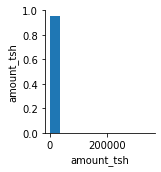

In [76]:
sns.pairplot(df_train[columns_to_use])

In [46]:
df_training_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [33]:
df_water.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [34]:
df_water.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [36]:
df_water.shape

(14850, 40)

In [21]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
df_vehicles = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,20,39,40,41,43,47,48,49,54,57,58,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
df_people = pd.read_csv('Traffic_Crashes_-_People.csv')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,12,19,20,21,22,23,24,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df[df['RD_NO']== 'HY368708']

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
49004,HY368708,NaN,08/04/2015 12:40:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,12,3,8,41.903416,-87.656037,POINT (-87.65603711678 41.903416088848)


In [27]:
df_people.head()

,PERSON_ID,PERSON_TYPE,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O10,DRIVER,HY368708,10.0,08/04/2015 12:40:00 PM,NaN,CHICAGO,IL,60641,M,...,NaN,FAILED TO YIELD,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O100,DRIVER,HY374018,96.0,07/31/2015 05:50:00 PM,NaN,ELK GROVE,IL,60007,M,...,NaN,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O1000,DRIVER,HY407431,954.0,09/02/2015 11:45:00 AM,NaN,CHICAGO,IL,NaN,M,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10000,DRIVER,HY484148,9561.0,10/31/2015 09:30:00 PM,NaN,SKOKIE,IL,60076,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O100001,DRIVER,HZ525619,96762.0,11/15/2016 05:45:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [25]:
df_vehicles.head()

,CRASH_UNIT_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,10,HY368708,08/04/2015 12:40:00 PM,1,DRIVER,NaN,10.0,NaN,FORD,Focus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,HY374018,07/31/2015 05:50:00 PM,1,DRIVER,NaN,96.0,NaN,NISSAN,Pathfinder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000,HY407431,09/02/2015 11:45:00 AM,1,DRIVER,NaN,954.0,NaN,FORD,F150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,HY484148,10/31/2015 09:30:00 PM,2,DRIVER,NaN,9561.0,NaN,HYUNDAI,SONATA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000,HZ518934,11/16/2016 01:00:00 PM,2,PARKED,NaN,96745.0,NaN,"TOYOTA MOTOR COMPANY, LTD.",RAV4 (sport utility),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_terry = pd.read_csv('Terry_Stops.csv')


In [11]:
df_churn = pd.read_csv('bigml_59c28831336c6604c800002a.csv')


In [12]:
df_churn.shape

(3333, 21)

In [15]:
df_churn['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [8]:
df_terry.shape

(39061, 23)

In [9]:
df_terry.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,...,01:06:00,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-
3,-,-1,20150000002815,51725,Field Contact,None,7456,1979,M,White,...,19:27:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-
4,-,-1,20150000002815,51727,Field Contact,None,7456,1979,M,White,...,19:32:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-


In [10]:
df_terry.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [3]:
df.shape

(372312, 48)

In [4]:
df.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC334993,NaN,07/04/2019 10:33:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879)
1,JC370822,NaN,07/30/2019 10:22:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377)
2,JC387098,NaN,08/10/2019 05:00:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,...,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752)
3,JC395195,NaN,08/16/2019 04:53:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689)
4,JC396604,NaN,08/17/2019 04:04:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802)


In [5]:
df.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE

In [18]:
df["PRIM_CONTRIBUTORY_CAUSE"].value_counts()

UNABLE TO DETERMINE                                                                 134546
FAILING TO YIELD RIGHT-OF-WAY                                                        41796
FOLLOWING TOO CLOSELY                                                                41644
NOT APPLICABLE                                                                       20175
IMPROPER OVERTAKING/PASSING                                                          18163
IMPROPER BACKING                                                                     16956
FAILING TO REDUCE SPEED TO AVOID CRASH                                               15176
IMPROPER LANE USAGE                                                                  15140
IMPROPER TURNING/NO SIGNAL                                                           12644
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  11641
DISREGARDING TRAFFIC SIGNALS                                                          6048

In [19]:
df['INJURIES_TOTAL'].value_counts()


0.0     325352
1.0      34536
2.0       6998
3.0       2073
4.0        729
5.0        275
6.0        110
7.0         42
8.0         15
9.0         14
10.0         7
11.0         5
15.0         2
13.0         2
21.0         2
16.0         1
Name: INJURIES_TOTAL, dtype: int64

In [20]:
df['INJURIES_FATAL'].value_counts()


0.0    369859
1.0       285
2.0        15
3.0         4
Name: INJURIES_FATAL, dtype: int64